# Task-2 :

#### Prepare a detailed approach for completing the analysis including activities .
- understanding the data distributions 
- feature engineering, data transformations
- modelling
- results interpretation and reporting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
trans_df= pd.read_csv('datasets\\transaction_cleaned.csv')
new_cust_list_df= pd.read_csv('datasets\\NewCustomerList_cleaned.csv')
cust_address_df= pd.read_excel('datasets\\CustomerAddress_cleaned.xlsx',skiprows=1)
cust_demographic_df= pd.read_csv('datasets\\cust_demograph_cleaned.csv')

In [3]:
trans_df.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [4]:
merged_df= pd.merge(trans_df,cust_address_df,on='customer_id')
merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,4 Shopko Circle,2196,NSW,Australia,5


In [5]:
merged_df= pd.merge(merged_df,cust_demographic_df,on='customer_id')
merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Full name
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,Kristos Anthony
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,Kristos Anthony
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,Kristos Anthony
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,Lauree O'Donnell
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,Lauree O'Donnell


In [6]:
cust_demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Full name
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,Talbot,,Male,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


In [7]:
new_cust_list_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [8]:
cust_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
merged_df.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    446
job_title  

In [10]:
merged_df.shape

(19968, 30)

In [11]:
merged_df.to_csv('merged.csv',index=False)

In [12]:
df= merged_df.dropna()
df.shape

(19522, 30)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19522 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19522 non-null  int64  
 1   product_id                           19522 non-null  int64  
 2   customer_id                          19522 non-null  int64  
 3   transaction_date                     19522 non-null  object 
 4   online_order                         19522 non-null  float64
 5   order_status                         19522 non-null  object 
 6   brand                                19522 non-null  object 
 7   product_line                         19522 non-null  object 
 8   product_class                        19522 non-null  object 
 9   product_size                         19522 non-null  object 
 10  list_price                           19522 non-null  float64
 11  standard_cost               

In [14]:
df.drop('Full name',axis=1,inplace=True)


In [15]:
df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0


In [16]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [17]:
import datetime as dt


In [18]:
df['DOB']=pd.to_datetime(df['DOB'])

In [19]:
df['age']= round((dt.datetime.now()-df['DOB'])/np.timedelta64(1,"Y")).astype('int64')

In [20]:
df.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69


In [21]:
df.drop(['deceased_indicator','address','postcode','first_name','last_name','DOB'],axis=1,inplace=True)

In [22]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,country,property_valuation,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Australia,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Australia,5,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Australia,5,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,45


In [23]:
df.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [24]:
df['product_first_sold_date'] = pd.TimedeltaIndex(df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,country,property_valuation,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Australia,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Australia,5,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Australia,5,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,45


In [25]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'state', 'country', 'property_valuation',
       'gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age'],
      dtype='object')

In [26]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['profit']= df['list_price'] - df['standard_cost']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19522 entries, 0 to 19967
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19522 non-null  int64         
 1   product_id                           19522 non-null  int64         
 2   customer_id                          19522 non-null  int64         
 3   transaction_date                     19522 non-null  datetime64[ns]
 4   online_order                         19522 non-null  float64       
 5   order_status                         19522 non-null  object        
 6   brand                                19522 non-null  object        
 7   product_line                         19522 non-null  object        
 8   product_class                        19522 non-null  object        
 9   product_size                         19522 non-null  object        
 10  list_price

In [28]:
df.gender.unique()

array(['Male', 'Female', 'F', 'M', 'U', 'Femal'], dtype=object)

In [29]:
df['gender'] = df['gender'].replace({'F':'Female','M':'Male','Femal':'Female','U':'Unkown'})


In [30]:
df['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [32]:
df['country'].unique()

array(['Australia'], dtype=object)

In [33]:
df['state'].unique()

array(['VIC', 'NSW', 'QLD', 'Victoria', 'New South Wales'], dtype=object)

In [34]:
df['state']=df['state'].replace({'Victoria':'VIC','New South Wales':'NSW'})

In [35]:
df['online_order'].unique()

array([0., 1.])

In [36]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,6,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,69,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,5,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,45,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,5,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,45,451.65


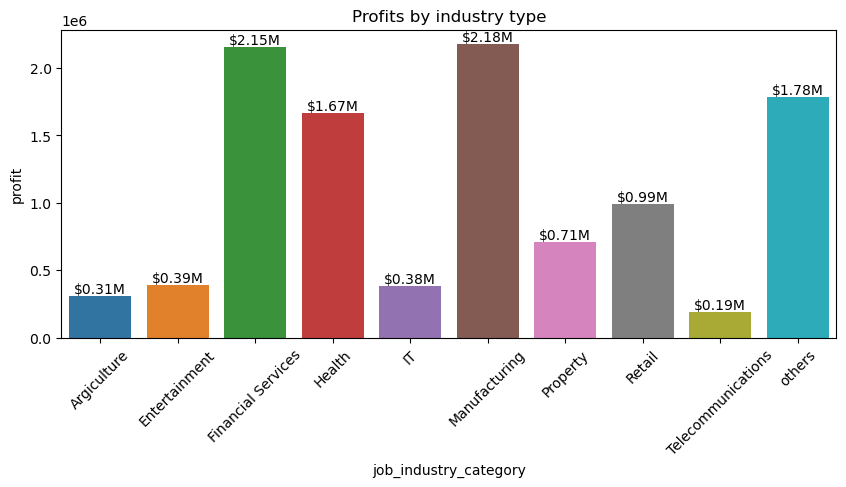

<Figure size 640x480 with 0 Axes>

In [37]:
profit_by_industry = pd.DataFrame(df.groupby(['job_industry_category'])['profit'].sum())
plt.figure(figsize=(10,4))
sns.barplot(x=profit_by_industry.index,y=profit_by_industry['profit'])
for index, value in enumerate(round(df.groupby(['job_industry_category'])['profit'].sum())):
    plt.text(index, value, f"${value/1e6:.2f}M",ha='center',va='bottom',fontsize=10)
plt.title("Profits by industry type")
plt.xticks(rotation=45)
plt.yticks()
plt.show()
plt.savefig('profitsbyIndustry.png')

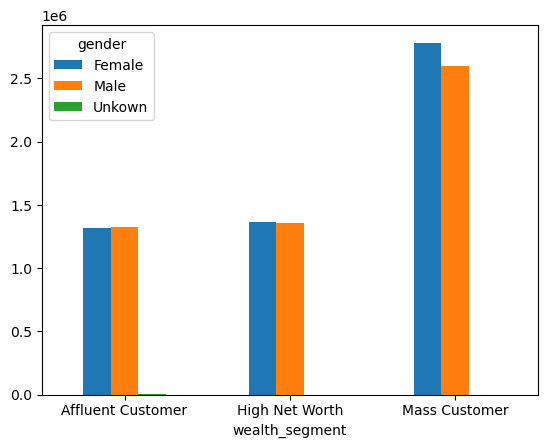

<Figure size 640x480 with 0 Axes>

In [38]:
df.groupby(['wealth_segment','gender'])['profit'].sum().unstack().plot.bar()
plt.xticks(rotation=0)
plt.show()
plt.savefig('wealthsegmentVsgender.png')

In [39]:
df.groupby(['wealth_segment'])['profit'].sum().reset_index()

,wealth_segment,profit
0,Affluent Customer,2.648541e+06
1,High Net Worth,2.721723e+06
2,Mass Customer,5.377422e+06


In [40]:
most_recent_purchase = df['transaction_date'].max()
df['last_purchase_days_ago']= most_recent_purchase - df['transaction_date']
df['last_purchase_days_ago']= df['last_purchase_days_ago']/np.timedelta64(1, 'D')


In [41]:
rfmTable = df.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})
rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary'
    }, inplace=True
)
rfm_df= pd.DataFrame(rfmTable).reset_index()
rfm_df.head()

,customer_id,recency,frequency,monetary
0,1,7.0,11,3018.09
1,2,128.0,3,2226.26
2,4,195.0,2,220.57
3,5,16.0,6,2394.94
4,6,64.0,5,3946.55


In [42]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413 entries, 1 to 3500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    3413 non-null   float64
 1   frequency  3413 non-null   int64  
 2   monetary   3413 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 106.7 KB


In [43]:
rfm_df.describe()

,customer_id,recency,frequency,monetary
count,3413.000000,3413.000000,3413.000000,3413.000000
mean,1750.651626,61.107237,5.719895,3149.043493
std,1009.515935,57.944618,2.324762,1777.997713
min,1.000000,0.000000,1.000000,15.080000
25%,877.000000,18.000000,4.000000,1863.530000
50%,1750.000000,44.000000,6.000000,2880.100000
75%,2623.000000,85.000000,7.000000,4228.660000
max,3500.000000,353.000000,14.000000,11668.950000


In [44]:
# def r_score(df):
#     recency= df['recency']
#     if recency== max(recency):
#         df['r_score']=1
#     elif ((df['recency'] < np.maximum(df['recency'])) & (df['recency'] > df['recency'].quantile(0.75))):
#         df['r_score']=2
#     elif ((df['recency'] <= df['recency'].quantile(0.75)) & (df['recency'] > df['recency'].quantile(0.5))):
#         df['r_score']=3
#     elif ((df['recency'] <= df['recency'].quatile(0.5)) & (df['recency'] > df['recency'].quantile(0.25))):
#         df['r_score']=4
#     elif ((df['recency'] <= df['recency'].quantile(0.25)) & (df['recency'] > np.minimum(df['recency']))):
#         df['r_score']=5
        
#     return df


In [45]:
# r_score(rfm_df)

In [46]:
def r_score(df):
    recency = df['recency']
    max_recency = max(recency)
    min_recency = min(recency)
    df['r_score'] = 0  # Initialize the 'r_score' column with zeros
    
    df.loc[recency == max_recency, 'r_score'] = 1
    df.loc[(recency < max_recency) & (recency > df['recency'].quantile(0.75)), 'r_score'] = 2
    df.loc[(recency <= df['recency'].quantile(0.75)) & (recency > df['recency'].quantile(0.5)), 'r_score'] = 3
    df.loc[(recency <= df['recency'].quantile(0.5)) & (recency > df['recency'].quantile(0.25)), 'r_score'] = 4
    df.loc[(recency <= df['recency'].quantile(0.25)) & (recency > min_recency), 'r_score'] = 5
    return df

def f_score(df):
    frequency = df['frequency']
    max_frequency = max(frequency)
    min_frequency = min(frequency)
    df['f_score'] = 0  # Initialize the 'r_score' column with zeros
    
    df.loc[frequency == max_frequency, 'f_score'] = 1
    df.loc[(frequency < max_frequency) & (frequency > df['frequency'].quantile(0.75)), 'f_score'] = 2
    df.loc[(frequency <= df['frequency'].quantile(0.75)) & (frequency > df['frequency'].quantile(0.5)), 'f_score'] = 3
    df.loc[(frequency <= df['frequency'].quantile(0.5)) & (frequency > df['frequency'].quantile(0.25)), 'f_score'] = 4
    df.loc[(frequency <= df['frequency'].quantile(0.25)) & (frequency > min_frequency), 'f_score'] = 5
    return df

def m_score(df):
    monetary = df['monetary']
    max_monetary = max(monetary)
    min_monetary = min(monetary)
    df['m_score'] = 0  # Initialize the 'r_score' column with zeros
    
    df.loc[monetary == max_monetary, 'm_score'] = 1
    df.loc[(monetary < max_monetary) & (monetary > df['monetary'].quantile(0.75)), 'm_score'] = 2
    df.loc[(monetary <= df['monetary'].quantile(0.75)) & (monetary > df['monetary'].quantile(0.5)), 'm_score'] = 3
    df.loc[(monetary <= df['monetary'].quantile(0.5)) & (monetary > df['monetary'].quantile(0.25)), 'm_score'] = 4
    df.loc[(monetary <= df['monetary'].quantile(0.25)) & (monetary > min_monetary), 'm_score'] = 5
    return df



In [47]:
rfm_df=r_score(rfm_df)
rfm_df=f_score(rfm_df)
rfm_df=m_score(rfm_df)

In [48]:
rfm_df['total_score']= round(((rfm_df['r_score']+ rfm_df['f_score']+ rfm_df['m_score'])/3),1)
rfm_df['rfm_class']= 100*rfm_df['r_score']+ 10*rfm_df['f_score']+ rfm_df['m_score']
rfm_df.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,total_score,rfm_class
0,1,7.0,11,3018.09,5,2,3,3.3,523
1,2,128.0,3,2226.26,2,5,4,3.7,254
2,4,195.0,2,220.57,2,5,5,4.0,255
3,5,16.0,6,2394.94,5,4,4,4.3,544
4,6,64.0,5,3946.55,3,4,3,3.3,343


In [49]:
def rfm_calss_endcoder(df):
    rfm_class = df['rfm_class']
    max_rfm_class = max(rfm_class)
    min_rfm_class = min(rfm_class)
    df['rfm_class_name'] = 'Diamond'  # Initialize the 'r_score' column with zeros
    
    df.loc[rfm_class ==max_rfm_class, 'rfm_class_name'] = 'Platinum'
    df.loc[(rfm_class < max_rfm_class) & (rfm_class > df['rfm_class'].quantile(0.75)), 'rfm_class_name'] = 'Gold'
    df.loc[(rfm_class <= df['rfm_class'].quantile(0.75)) & (rfm_class > df['rfm_class'].quantile(0.5)), 'rfm_class_name'] = 'Silver'
    df.loc[(rfm_class <= df['rfm_class'].quantile(0.5)) & (rfm_class > df['rfm_class'].quantile(0.25)), 'rfm_class_name'] = 'Bronze'
    df.loc[(rfm_class <= df['rfm_class'].quantile(0.25)) & (rfm_class > min_rfm_class), 'rfm_class_name'] = 'Basic'
    return df

In [50]:
rfm_df= rfm_calss_endcoder(rfm_df)
rfm_df.head()


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,total_score,rfm_class,rfm_class_name
0,1,7.0,11,3018.09,5,2,3,3.3,523,Gold
1,2,128.0,3,2226.26,2,5,4,3.7,254,Basic
2,4,195.0,2,220.57,2,5,5,4.0,255,Basic
3,5,16.0,6,2394.94,5,4,4,4.3,544,Gold
4,6,64.0,5,3946.55,3,4,3,3.3,343,Bronze


In [51]:
rfm_df.rfm_class_name

0         Gold
1        Basic
2        Basic
3         Gold
4       Bronze
         ...  
3408     Basic
3409    Bronze
3410     Basic
3411    Bronze
3412     Basic
Name: rfm_class_name, Length: 3413, dtype: object

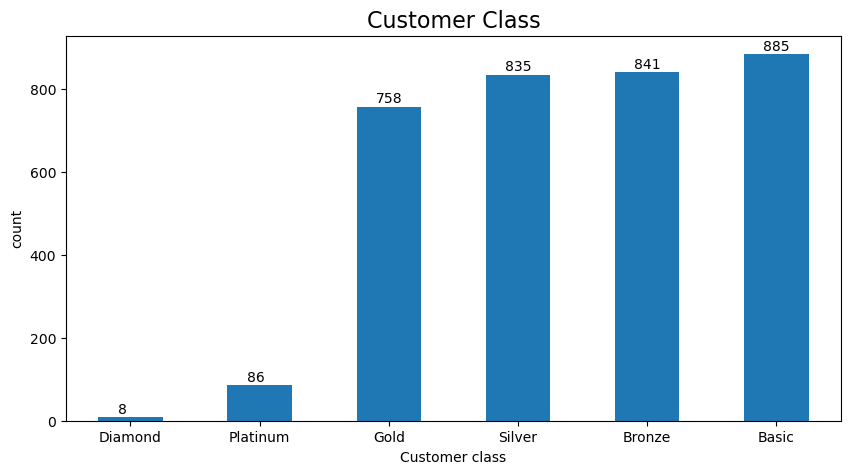

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(10,5))
# rfm_df.rename(columns={'rfm_class_name': 'count'}, inplace=True)
rfm_df.groupby('rfm_class_name')['customer_id'].count().sort_values().plot(kind='bar')

for i, v in enumerate(rfm_df.groupby('rfm_class_name')['customer_id'].count().sort_values()):
    plt.text(i - 0.10, v + 10, int(v), color='black')
plt.xticks(rotation=0)
plt.title('Customer Class',fontsize=16)
plt.xlabel('Customer class')
plt.ylabel('count')
plt.show()
plt.savefig('Customerclassfrequency.png')

In [53]:
df= df[df['age']!=180]

In [54]:
df.age.value_counts(bins=5).sort_index()

(20.927999999999997, 35.2]    4525
(35.2, 49.4]                  7765
(49.4, 63.6]                  5053
(63.6, 77.8]                  2140
(77.8, 92.0]                    30
Name: age, dtype: int64

In [55]:
final_merge=pd.merge(df,rfm_df,on='customer_id')

## Bike purchased

In [61]:
df=age_class(new_cust_list_df)

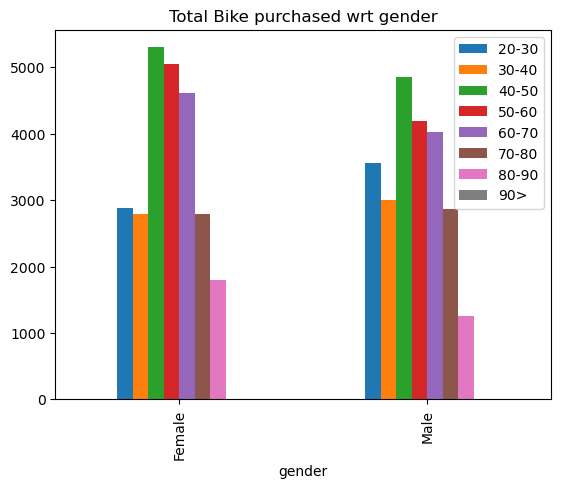

<Figure size 640x480 with 0 Axes>

In [62]:
df1=df[df['gender']!='Unknown']
temp_df=df1.groupby(['gender','age_class'])['past_3_years_bike_related_purchases'].sum().unstack()
# plt.figure(figsize=(12,4))
temp_df.plot.bar()
plt.title('Total Bike purchased wrt gender')
plt.legend(loc='upper right')
plt.show()

plt.savefig('totalBikepurchasedwrtGender.png')

## New  customer List

In [57]:
new_cust_list_df['DOB']= pd.to_datetime(new_cust_list_df['DOB'])

In [58]:
new_cust_list_df['age']=round(( dt.datetime.now()- new_cust_list_df['DOB'])/ np.timedelta64(1,'Y'))
new_cust_list_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,45.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58.0


In [59]:
def age_class(df):
    class_intervals = [20, 30, 40, 50, 60, 70, 80, 90, 100]
    class_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90>']
    df['age_class'] = pd.cut(df['age'], bins=class_intervals, labels=class_labels, right=False)
    return df
new_cust_list_df=age_class(new_cust_list_df)
new_cust_list_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0,60-70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0,50-60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49.0,40-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,45.0,40-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58.0,50-60


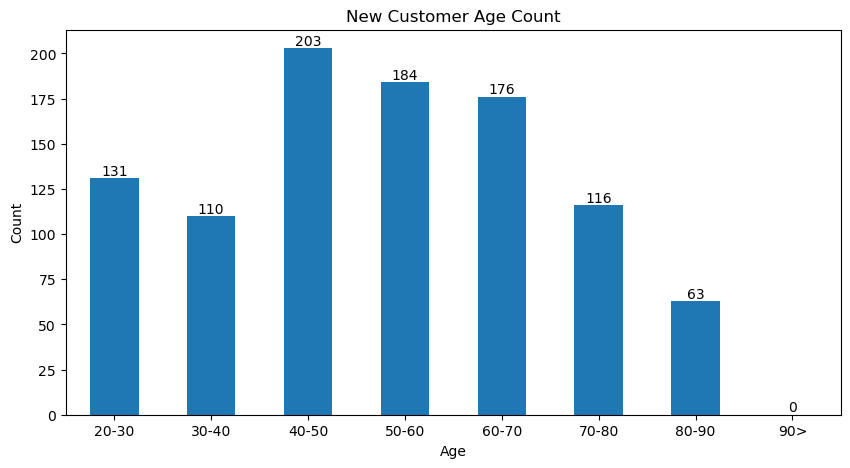

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(10,5))
new_cust_list_df['age_class'].value_counts().sort_index().plot(kind='bar')
for index, value in enumerate(new_cust_list_df['age_class'].value_counts().sort_index()):
    plt.text(index, value, str(value),ha='center',va='bottom')
plt.title('New Customer Age Count')
plt.ylabel('Count')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.show()
plt.savefig('NewcustomerAgedistribution.png')

In [63]:
# def age_class(df):
#     if (df['age'] > 20) and (df['age'] < 30):
#         df['age_class'] = '20-30'
#     elif (df['age'] >= 30) and (df['age'] < 40):
#         df['age_class'] = '30-40'
#     elif (df['age'] >= 40) and (df['age'] < 50):
#         df['age_class'] = '40-50'
#     elif (df['age'] >= 50) and (df['age'] < 60):
#         df['age_class'] = '50-60'
#     elif (df['age'] >= 60) and (df['age'] < 70):
#         df['age_class'] = '60-70'
#     elif (df['age'] >= 70) and (df['age'] < 80):
#         df['age_class'] = '70-80'
#     elif (df['age'] >= 80) and (df['age'] < 90):
#         df['age_class'] = '80-90'
#     else:
#         df['age_class'] = '90>'
#     return df


<Figure size 1600x400 with 0 Axes>

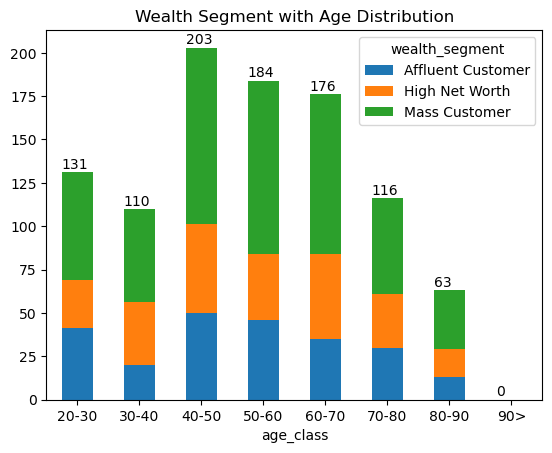

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(16,4))
new_cust_list_df.groupby(['age_class','wealth_segment'])['wealth_segment'].count().unstack().plot(kind='bar',stacked=True)

for i, v in enumerate(new_cust_list_df.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v+2 , int(v), color='black')
plt.title('Wealth Segment with Age Distribution')
plt.xticks(rotation=0)
plt.show()
plt.savefig('Wealthsegmentwithage.png')

## Cars owned

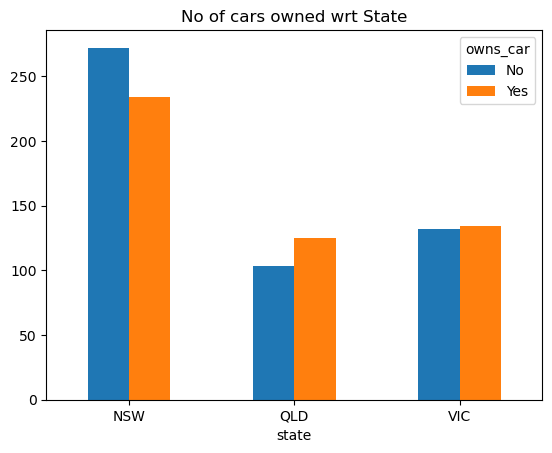

In [65]:
df.groupby(['state','owns_car'])['owns_car'].count().unstack().plot.bar()
plt.xticks(rotation=0)
plt.title('No of cars owned wrt State')
plt.savefig('NoofcarsownedwrtState.png')